In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16,6)
plt.rc('font',family='serif')
plt.rcParams.update({'font.size': 24})
plt.rc('text', usetex=True)
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'

### Figure 1

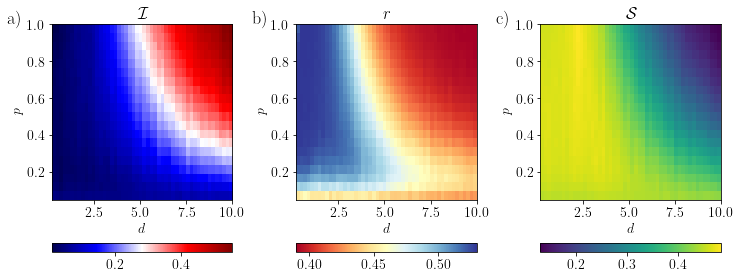

In [2]:
mpl.rcParams['figure.figsize'] = (12,8)
plt.rcParams.update({'font.size': 14})
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Paired.colors)
fig, axes = plt.subplots(1,3)
ax1,ax2,ax3 = axes

n=14
delta = 1.0
reps = 512

with h5py.File('avg-XXZ/avg-n%s-Jz%.2f-reps%s.h5' %(n,delta,reps),'r') as hf:
    ent2d = np.array(hf.get('Sent'))
    imb2d = np.array(hf.get('imb'))
    rlist2d = np.array(hf.get('rlist'))

imb = ax1.imshow(imb2d,origin='lower',aspect='10',cmap='seismic',extent=(0.2,10,0.05,1))
fig.colorbar(imb, orientation="horizontal", pad=0.1,ax=ax1)
ax1.set(title=r'$\mathcal{I}$')
ax1.set(xlabel=r'$d$',ylabel=r'$p$')

r = ax2.imshow(rlist2d,origin='lower',aspect='10',cmap='RdYlBu',extent=(0.2,10,0.05,1))
fig.colorbar(r, orientation="horizontal", pad=0.1,ax=ax2)
ax2.set(xlabel=r'$d$',ylabel=r'$p$')
ax2.set(title=r'$r$')

ent = ax3.imshow(ent2d,origin='lower',aspect='10',extent=(0.2,10,0.05,1))
fig.colorbar(ent, orientation="horizontal", pad=0.1,ax=ax3)
ax3.set(xlabel=r'$d$',ylabel=r'$p$')
ax3.set(title=r'$\mathcal{S}$')

ax1.text(-2.2,1.0,r'a)',fontsize=18)
ax2.text(-2.2,1.0,r'b)',fontsize=18)
ax3.text(-2.2,1.0,r'c)',fontsize=18)
plt.subplots_adjust(hspace=0.,wspace=0.35)
plt.savefig('Fig1.pdf',dpi=300,bbox_inches='tight')
plt.show()
plt.close() 

### Figure 2

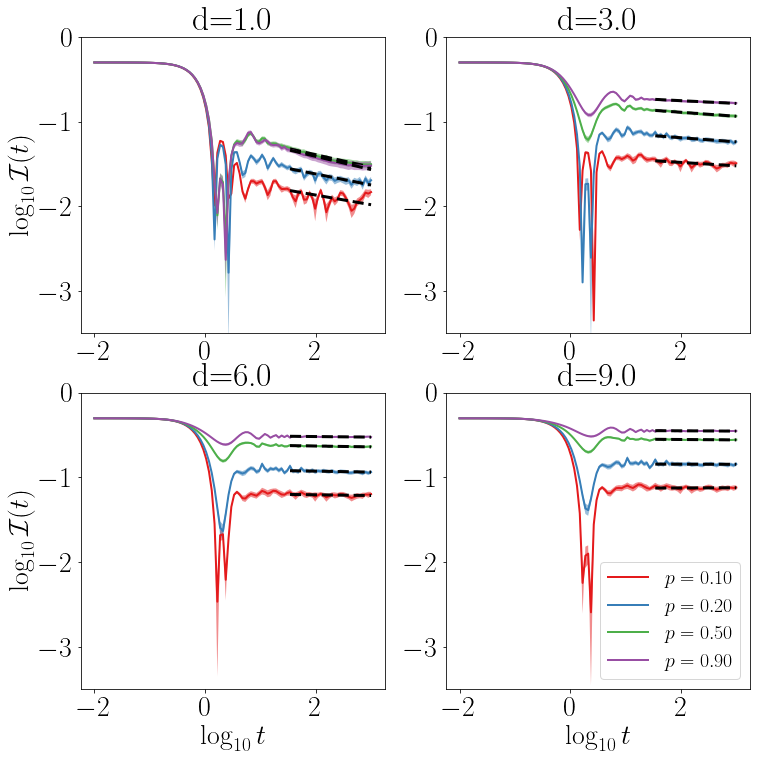

In [11]:
from scipy.ndimage import gaussian_filter as gf
plt.rcParams.update({'font.size': 28})
mpl.rcParams['figure.figsize'] = (12,12)
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Set1.colors)
fig, axes = plt.subplots(2,2)
ax1,ax2 = axes[0]
bx1,bx2 = axes[1]
axlist=[ax1,ax2,bx1,bx2]

reps = 1024
dc = 0
for d in [1.0,3.0,6.0,9.0]:
    ax = axlist[dc]
    for L in [16]:
        for p in [0.1,0.2,0.5,0.9]:
            imblist = np.zeros((reps,100))
            imb_var_list = np.zeros(100)
            imb_var_list2 = np.zeros(100)
            for rep in range(reps):
                if rep < 512:
                    with h5py.File('data/dataN%s/dyn-d%.2f-Jz%.2f-p%.2f-rep%s.h5' %(L,d,1.0,p,rep),'r') as hf:
                        zlist = np.array(hf.get('imb'))
                        tlist = np.array(hf.get('tlist'))
                        imblist[rep] = zlist
                elif rep > 512:
                    
                    with h5py.File('data5/dataN%s/dyn-d%.2f-Jz%.2f-p%s-rep%s.h5' %(L,d,1.0,p,rep-512),'r') as hf:
                        zlist = np.array(hf.get('imb'))
                        tlist = np.array(hf.get('tlist'))
                        imblist[rep] = zlist
            
            if p == 0.1:
                imblist2 = gf(np.mean(imblist,axis=0),1)
            else:
                imblist2 = np.mean(imblist,axis=0)
                
            varlist = np.var(imblist,axis=0)
            imblist = imblist2
            for v in range(len(varlist)):
                imb_var_list[v] = imblist[v]+(varlist[v])
                imb_var_list2[v] = imblist[v]-(varlist[v])

            ax.plot(np.log10(tlist),np.log10(np.abs(imblist)),'-',label=r'$p = %.2f$' %p,linewidth=2)
            ax.fill_between(np.log10(tlist),np.log10(np.abs(imb_var_list2)),np.log10(np.abs(imb_var_list)),alpha=0.5)

            fit = np.polyfit(np.log10(tlist[-50::]),np.log10(np.abs(imblist)[-50::]),1)
            ax.plot(np.log10(tlist[-30::]),[fit[-1]+(fit[0])*t for t in np.log10(tlist[-30::])],'k--',linewidth=3)
            ax.set(title=r'd=%.1f' %d,ylim=(-3.5,0))
            
    dc += 1 
    
ax1.set(ylabel=r'$\log_{10}\mathcal{I}(t)$')
bx1.set(ylabel=r'$\log_{10}\mathcal{I}(t)$')
bx1.set(xlabel=r'$\log_{10}t$')
bx2.set(xlabel=r'$\log_{10}t$')
bx2.legend(loc='lower right',fontsize=20)
plt.savefig('Fig2.pdf',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

### Figure 3

1.0 0.1 0.3026060334396549
1.0 0.2 0.31593817846644123
1.0 0.5 0.330384000773524
1.0 0.9 0.3614592846306067
3.0 0.1 0.13478391119890798
3.0 0.2 0.14590122587308374
3.0 0.5 0.08209990203137156
3.0 0.9 0.03994259789868036
6.0 0.1 0.06625455694198043
6.0 0.2 0.05102285193007975
6.0 0.5 0.015503725290400625
6.0 0.9 0.004734360829962869
9.0 0.1 0.034423387850626444
9.0 0.2 0.02728641341266862
9.0 0.5 0.0066746694040267195
9.0 0.9 0.002162536026062602


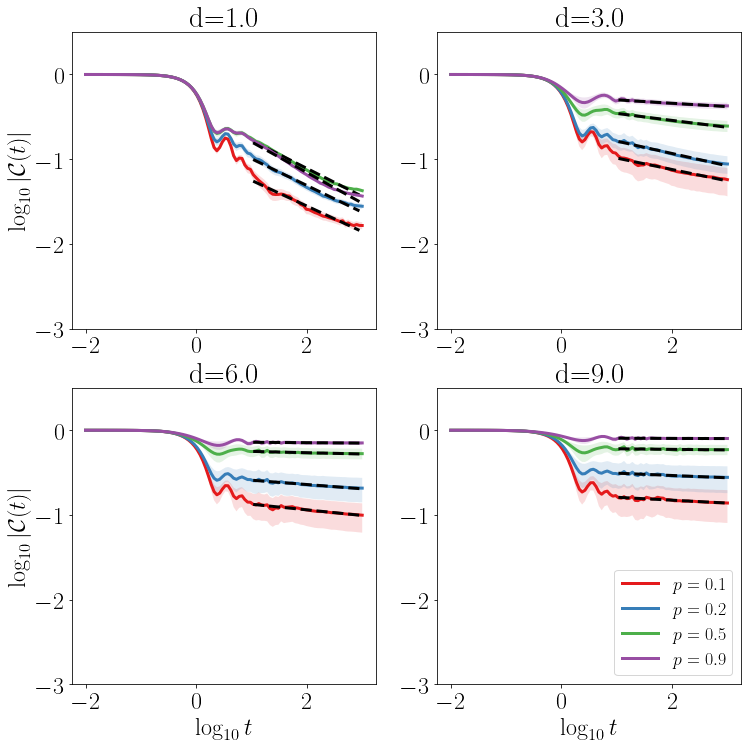

In [268]:
from scipy.ndimage import gaussian_filter as gf
mpl.rcParams['figure.figsize'] = (12,12)
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Set1.colors)

fig, axes = plt.subplots(2,2)
ax1,ax2 = axes[0]
bx1,bx2 = axes[1]
axlist=[ax1,ax2,bx1,bx2]

reps = 512
dc = 0
for d in [1.0,3.0,6.0,9.0]:
    ax = axlist[dc]
    for L in [16]:
        for p in [0.1,0.2,0.5,0.9]:
            corrlist = np.zeros((reps,100))
            cr_var_list = np.zeros(100)
            cr_var_list2 = np.zeros(100)

            for rep in range(reps):
                with h5py.File('data5/dataN%s/dyn-d%.2f-Jz%.2f-p%s-rep%s.h5' %(L,d,1.0,p,rep),'r') as hf:
                    corr = np.array(hf.get('inf_temp_corr'))
                    tlist = np.array(hf.get('tlist'))
                    corrlist[rep] = corr.real

            corrlist2 = np.mean(corrlist,axis=0)
                
            varlist = (np.var(np.abs(corrlist),axis=0))
            corrlist = corrlist2
            for v in range(len(varlist)):
                cr_var_list[v] = max(np.log10(np.abs(corrlist[v]+(varlist[v]))),np.log10(np.abs(corrlist[v]-(varlist[v]))))
                cr_var_list2[v] = min(np.log10(np.abs(corrlist[v]+(varlist[v]))),np.log10(np.abs(corrlist[v]-(varlist[v]))))


            ax.plot(np.log10(tlist),np.log10(np.abs(corrlist)),'-',label=r'$p = %s$' %p,linewidth=3)
            ax.fill_between(np.log10(tlist),cr_var_list2,cr_var_list,alpha=0.15)

            fit = np.polyfit(np.log10(tlist[-35:-5]),np.log10(np.abs(corrlist)[-35:-5]),1)
            print(d,p,-fit[0])
            ax.plot(np.log10(tlist[-35:-5]),[fit[-1]+(fit[0])*t for t in np.log10(tlist[-35:-5])],'k--',linewidth=3)

            ax.set(title=r'd=%.1f' %d)
            ax.set(ylim=(-3,0.5))
            
    dc += 1 

ax1.set(ylabel=r'$\log_{10}|\mathcal{C}(t)|$')
bx1.set(ylabel=r'$\log_{10}|\mathcal{C}(t)|$')
bx1.set(xlabel=r'$\log_{10}t$')
bx2.set(xlabel=r'$\log_{10}t$')
bx2.legend(loc='lower right',fontsize=18)
plt.savefig('Fig3.pdf',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

### Figure 4

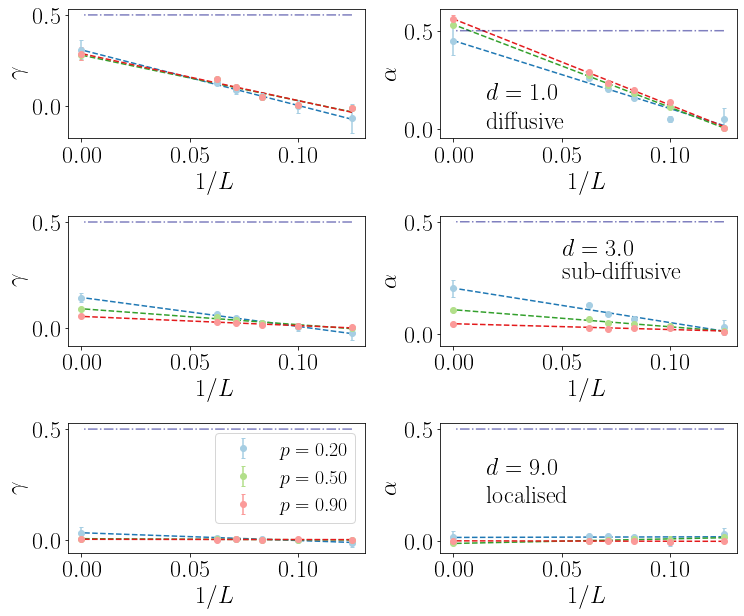

In [294]:
from scipy.ndimage import gaussian_filter as gf

mpl.rcParams['figure.figsize'] = (12,10)
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Paired.colors)
fig, axes = plt.subplots(3,2)
ax1,ax2 = axes[0]
bx1,bx2 = axes[1]
cx1,cx2 = axes[2]

axlist = [[ax1,ax2],[bx1,bx2],[cx1,cx2]]
Llist = [8,10,12,14,16]
reps = 512

axcount = 0
for d in [1.0,3.0,9.0]:
    axes = axlist[axcount]
    for p in [0.2,0.5,0.9]:
        count = 0
        alist = np.zeros((len(Llist)))
        errlist = np.zeros((len(Llist)))
        for L in Llist:
            if L == 8:
                reps = 4096
            elif L == 9:
                reps = 2048
            elif L == 10 or L == 11:
                reps = 1024
            elif 11<L<16:
                reps = 512
            elif L == 16:
                reps = 1024

            imblist = np.zeros((reps,len(tlist)))
            for rep in range(reps):
                if L == 16 and rep < 512:
                    with h5py.File('data/dataN%s/dyn-d%.2f-Jz%.2f-p%.2f-rep%s.h5' %(L,d,1.0,p,rep),'r') as hf:
                        zlist = np.array(hf.get('imb'))
                        tlist = np.array(hf.get('tlist'))
                        imblist[rep] = zlist
                elif L == 16 and rep >= 512:
                    with h5py.File('data5/dataN%s/dyn-d%.2f-Jz%.2f-p%s-rep%s.h5' %(L,d,1.0,p,rep-512),'r') as hf:
                        zlist = np.array(hf.get('imb'))
                        tlist = np.array(hf.get('tlist'))
                        imblist[rep] = zlist
                elif L != 16:
                    with h5py.File('data5/dataN%s/dyn-d%.2f-Jz%.2f-p%s-rep%s.h5' %(L,d,1.0,p,rep),'r') as hf:
                        zlist = np.array(hf.get('imb'))
                        tlist = np.array(hf.get('tlist'))
                        imblist[rep] = zlist

            imblist = np.mean(imblist,axis=0)
            fit,cov = np.polyfit(np.log(tlist[-35::]),np.log(np.abs(imblist)[-35::]),1,cov=True)
            alist[count] = -fit[0]
            errlist[count] = np.sqrt(np.diag(cov)[0])
            count += 1

        fit = np.polyfit(([1/L for L in Llist]),alist,1)
        axes[0].errorbar((np.concatenate(([0],[1/L for L in Llist]))),np.concatenate(([[fit[-1]],alist])),yerr=np.concatenate(([np.sqrt(np.diag(cov)[-1])],errlist)),fmt='o',capsize=2.0,label=r'$p = %.2f$' %p)
        axes[0].plot(([1/L for L in range(8,10000)]),[fit[-1]+(fit[0])*t for t in ([1/L for L in range(8,10000)])],'--')

    axes[0].plot(([1/L for L in range(8,10000)]),0.5*np.ones(9992),'-.',color='navy',alpha=0.5)
    axes[0].set(xlabel=r'$1/L$',ylabel=r'$\gamma$')
    
    Llist = [8,10,12,14,16]
    for p in [0.2,0.5,0.9]:
        count = 0
        alist = np.zeros((len(Llist)))
        errlist = np.zeros((len(Llist)))
        for L in Llist:
            if L == 8:
                reps = 4096
            elif L == 9:
                reps = 2048
            elif L == 10:
                reps = 1024
            elif 11<L<16:
                reps = 512
            elif L == 16:
                reps = 512
            clist = np.zeros((reps,100))
            for rep in range(reps):
                with h5py.File('data5/dataN%s/dyn-d%.2f-Jz%.2f-p%s-rep%s.h5' %(L,d,1.0,p,rep),'r') as hf:
                    zlist = np.array(hf.get('inf_temp_corr'))
                    tlist = np.array(hf.get('tlist'))
                    clist[rep] = zlist.real

            cvar = np.var(clist,axis=0)
            clist = np.mean(clist,axis=0)
            cvar_log = [np.sqrt(cvar[i])/clist[i] for i in range(len(clist))]
            
            tmin = -38
            if L < 10:
                tmax = -25
            elif L == 10:
                tmax = -23
            elif L == 12:
                tmin = -35
                tmax = -15
            elif L == 14:
                tmin = -30
                tmax = -5
            elif L > 14:
                tmin = -25
                tmax = -1

            fit,cov = np.polyfit(np.log(tlist[tmin:tmax]),np.log((clist)[tmin:tmax]),1,cov=True)
            alist[count] = -fit[0]
            errlist[count] = np.sqrt(np.diag(cov)[0])
            count += 1

        fit,cov = np.polyfit(([1/L for L in Llist]),alist,1,cov=True)
        axes[1].errorbar((np.concatenate(([0],[1/L for L in Llist]))),np.concatenate(([[fit[1]],alist])),yerr=np.concatenate(([np.sqrt(np.diag(cov)[1])],errlist)),fmt='o',capsize=2.0,label=r'$p = %.2f$' %p)
        axes[1].plot(([1/L for L in range(8,100000)]),[fit[1]+(fit[0])*t for t in ([1/L for L in range(8,100000)])],'--')

    axes[1].plot(([1/L for L in range(8,10000)]),0.5*np.ones(9992),'-.',color='navy',alpha=0.5)
    axes[1].set(xlabel=r'$1/L$',ylabel=r'$\alpha$',ylim=(-0.05))
    
    axcount += 1

axlist[-1][0].legend(loc='upper right',fontsize=20)
plt.subplots_adjust(hspace=0.6,wspace=0.25)
axlist[0][1].text(0.015,0.15,r'$d=1.0$')
axlist[0][1].text(0.015,0.0,r'diffusive')

axlist[1][1].text(0.05,0.35,r'$d=3.0$')
axlist[1][1].text(0.05,0.25,r'sub-diffusive')

axlist[2][1].text(0.015,0.3,r'$d=9.0$')
axlist[2][1].text(0.015,0.175,r'localised')
plt.savefig('Fig4.pdf',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

### Figure 5

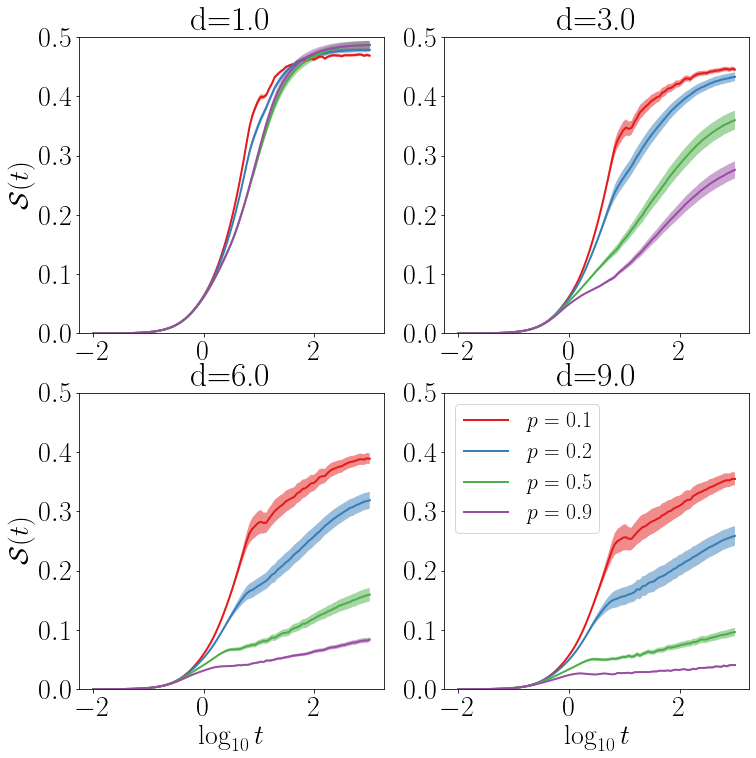

In [61]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,12)
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Set1.colors)

fig, axes = plt.subplots(2,2)
ax1,ax2 = axes[0]
bx1,bx2 = axes[1]
axlist=[ax1,ax2,bx1,bx2]

reps = 512
dc = 0
for d in [1.0,3.0,6.0,9.0]:
    ax = axlist[dc]
    for L in [16]:
        for p in [0.1,0.2,0.5,0.9]:
            entlist = np.zeros((reps,100))
            cr_var_list = np.zeros(100)
            cr_var_list2 = np.zeros(100)
            for rep in range(reps):
                with h5py.File('data/dataN%s/dyn-d%.2f-Jz%.2f-p%.2f-rep%s.h5' %(L,d,1.0,p,rep),'r') as hf:
                    ent = np.array(hf.get('ent'))
                    tlist = np.array(hf.get('tlist'))
                    entlist[rep] = ent.real

            entlist2 = np.mean(entlist,axis=0)
            varlist = np.var(entlist,axis=0)
            entlist = entlist2
            for v in range(len(varlist)):
                cr_var_list[v] = (entlist[v])+(varlist[v])
                cr_var_list2[v] = (entlist[v])-(varlist[v])

            ax.plot(np.log10(tlist),(np.abs(entlist)),'-',label=r'$p = %s$' %p,linewidth=2)
            ax.fill_between(np.log10(tlist),(np.abs(cr_var_list2)),(np.abs(cr_var_list)),alpha=0.5)

            ax.set(ylim=(0,0.5),title=r'd=%.1f' %d)

    dc += 1 

ax1.set(ylabel=r'$\mathcal{S}(t)$')
bx1.set(ylabel=r'$\mathcal{S}(t)$')
bx1.set(xlabel=r'$\log_{10}t$')
bx2.set(xlabel=r'$\log_{10}t$')
bx2.legend(loc='upper left',fontsize=22)
plt.savefig('Fig5.pdf',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

##### Figure 6

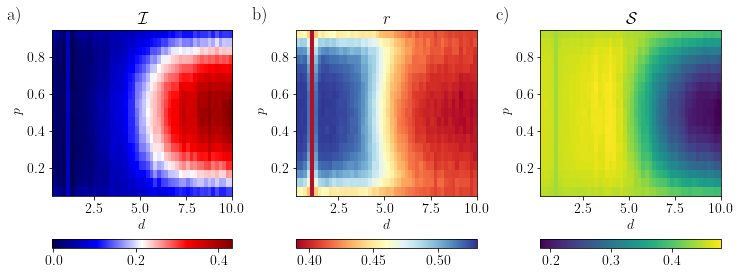

In [7]:
mpl.rcParams['figure.figsize'] = (12,8)
plt.rcParams.update({'font.size': 14})
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Paired.colors)
fig, axes = plt.subplots(1,3)
ax1,ax2,ax3 = axes

n=14
delta = 1.0
reps = 512

with h5py.File('avg-XXZ/avg2-n%s-Jz%.2f-reps%s.h5' %(n,delta,reps),'r') as hf:
    ent2d = np.array(hf.get('Sent'))[0:-1]
    imb2d = np.array(hf.get('imb'))[0:-1]
    rlist2d = np.array(hf.get('rlist'))[0:-1]
    
imb = ax1.imshow(imb2d,origin='lower',aspect='10',cmap='seismic',extent=(0.2,10,0.05,0.95))
fig.colorbar(imb, orientation="horizontal", pad=0.1,ax=ax1)
ax1.set(title=r'$\mathcal{I}$')
ax1.set(xlabel=r'$d$',ylabel=r'$p$')

r = ax2.imshow(rlist2d,origin='lower',aspect='10',cmap='RdYlBu',extent=(0.2,10,0.05,0.95))
fig.colorbar(r, orientation="horizontal", pad=0.1,ax=ax2)
ax2.set(xlabel=r'$d$',ylabel=r'$p$')
ax2.set(title=r'$r$')

ent = ax3.imshow(ent2d,origin='lower',aspect='10',extent=(0.2,10,0.05,0.95))
fig.colorbar(ent, orientation="horizontal", pad=0.1,ax=ax3)
ax3.set(xlabel=r'$d$',ylabel=r'$p$')
ax3.set(title=r'$\mathcal{S}$')

ax1.text(-2.2,1.0,r'a)',fontsize=18)
ax2.text(-2.2,1.0,r'b)',fontsize=18)
ax3.text(-2.2,1.0,r'c)',fontsize=18)

plt.subplots_adjust(hspace=0.,wspace=0.35)
plt.savefig('Fig6.pdf',dpi=300,bbox_inches='tight')
plt.show()
plt.close() 

### Figure 7

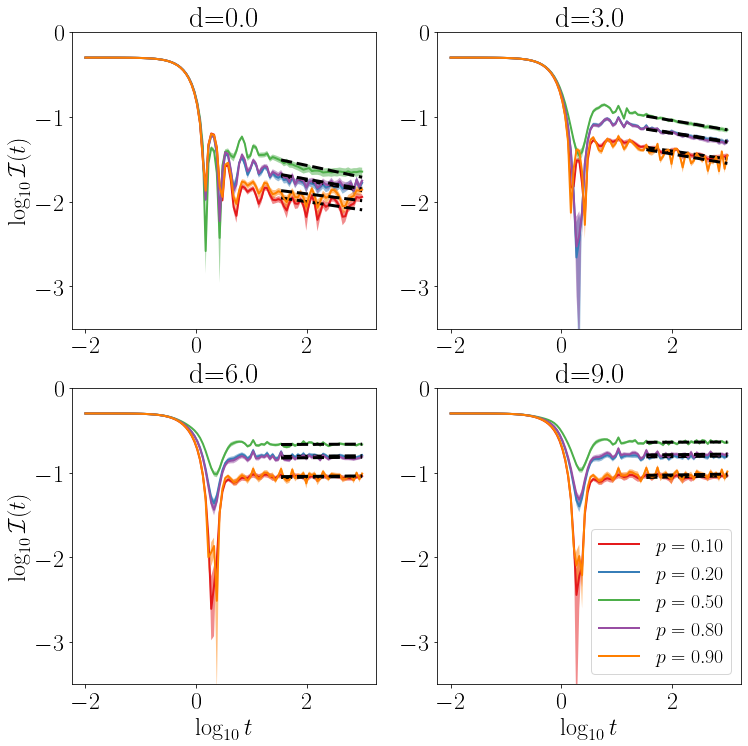

In [64]:
from scipy.ndimage import gaussian_filter as gf
plt.rcParams.update({'font.size': 28})
mpl.rcParams['figure.figsize'] = (12,12)
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Set1.colors)
fig, axes = plt.subplots(2,2)
ax1,ax2 = axes[0]
bx1,bx2 = axes[1]
axlist=[ax1,ax2,bx1,bx2]

reps = 1024
dc = 0
for d in [0.0,3.0,6.0,9.0]:
    ax = axlist[dc]
    for L in [16]:
        for p in [0.1,0.2,0.5,0.8,0.9]:
            imblist = np.zeros((reps,100))
            imb_var_list = np.zeros(100)
            imb_var_list2 = np.zeros(100)
            for rep in range(reps):
                with h5py.File('data2/dataN%s/dyn-d%.2f-Jz%.2f-p%.2f-rep%s.h5' %(L,d,1.0,p,rep),'r') as hf:
                    zlist = np.array(hf.get('imb'))
                    tlist = np.array(hf.get('tlist'))
                    imblist[rep] = zlist
            
            if p == 0.1 or p == 0.9 and d == 0.0:
                imblist2 = gf(np.mean(imblist,axis=0),1)
            else:
                imblist2 = np.mean(imblist,axis=0)
                
            varlist = np.var(imblist,axis=0)
            imblist = imblist2
            for v in range(len(varlist)):
                imb_var_list[v] = imblist[v]+(varlist[v])
                imb_var_list2[v] = imblist[v]-(varlist[v])

            ax.plot(np.log10(tlist),np.log10(np.abs(imblist)),'-',label=r'$p = %.2f$' %p,linewidth=2)
            ax.fill_between(np.log10(tlist),np.log10(np.abs(imb_var_list2)),np.log10(np.abs(imb_var_list)),alpha=0.5)

            if d != 1.0:
                fit = np.polyfit(np.log10(tlist[-50::]),np.log10(np.abs(imblist)[-50::]),1)
                ax.plot(np.log10(tlist[-30::]),[fit[-1]+(fit[0])*t for t in np.log10(tlist[-30::])],'k--',linewidth=3)
            ax.set(title=r'd=%.1f' %d,ylim=(-3.5,0))
            
    dc += 1 
    
ax1.set(ylabel=r'$\log_{10}\mathcal{I}(t)$')
bx1.set(ylabel=r'$\log_{10}\mathcal{I}(t)$')
bx1.set(xlabel=r'$\log_{10}t$')
bx2.set(xlabel=r'$\log_{10}t$')
bx2.legend(loc='lower right',fontsize=20)
plt.savefig('Fig7.pdf',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

### Figure 8

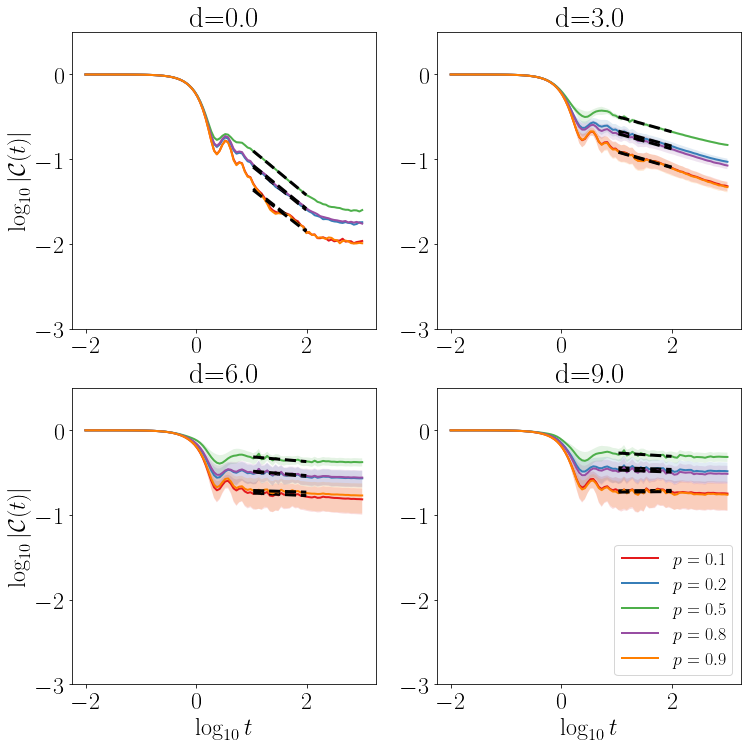

In [303]:
import matplotlib as mpl
from scipy.ndimage import gaussian_filter as gf
mpl.rcParams['figure.figsize'] = (12,12)
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Set1.colors)

fig, axes = plt.subplots(2,2)
ax1,ax2 = axes[0]
bx1,bx2 = axes[1]
axlist=[ax1,ax2,bx1,bx2]

reps = 512
dc = 0
for d in [0.0,3.0,6.0,9.0]:
    ax = axlist[dc]
    for L in [16]:
        for p in [0.1,0.2,0.5,0.8,0.9]:
            corrlist = np.zeros((reps,100))
            cr_var_list = np.zeros(100)
            cr_var_list2 = np.zeros(100)
            for rep in range(reps):
                with h5py.File('data6/dataN%s/dyn-d%.2f-Jz%.2f-p%s-rep%s.h5' %(L,d,1.0,p,rep),'r') as hf:
                    corr = np.array(hf.get('inf_temp_corr'))
                    tlist = np.array(hf.get('tlist'))
                    corrlist[rep] = corr.real

#             if p == 0.1 or d==1.0:
#                 corrlist2 = gf(np.mean(corrlist,axis=0),2)
#             else:
            corrlist2 = np.mean(corrlist,axis=0)
                
            varlist = (np.var(np.abs(corrlist),axis=0))
            corrlist = corrlist2
            for v in range(len(varlist)):
                cr_var_list[v] = max(np.log10(np.abs(corrlist[v]+(varlist[v]))),np.log10(np.abs(corrlist[v]-(varlist[v]))))
                cr_var_list2[v] = min(np.log10(np.abs(corrlist[v]+(varlist[v]))),np.log10(np.abs(corrlist[v]-(varlist[v]))))

            ax.plot(np.log10(tlist),np.log10(np.abs(corrlist)),'-',label=r'$p = %s$' %p,linewidth=2)
            ax.fill_between(np.log10(tlist),cr_var_list2,cr_var_list,alpha=0.15)
    
            fit = np.polyfit(np.log10(tlist[-40:-20]),np.log10(np.abs(corrlist)[-40:-20]),1)
            ax.plot(np.log10(tlist[-40:-20]),[fit[-1]+(fit[0])*t for t in np.log10(tlist[-40:-20])],'k--',linewidth=3)

            ax.set(title=r'd=%.1f' %d)
            ax.set(ylim=(-3,0.5))
            
    dc += 1 
    
ax1.set(ylabel=r'$\log_{10}|\mathcal{C}(t)|$')
bx1.set(ylabel=r'$\log_{10}|\mathcal{C}(t)|$')
bx1.set(xlabel=r'$\log_{10}t$')
bx2.set(xlabel=r'$\log_{10}t$')
bx2.legend(loc='lower right',fontsize=18)
plt.savefig('Fig8.pdf',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

### Figure 9

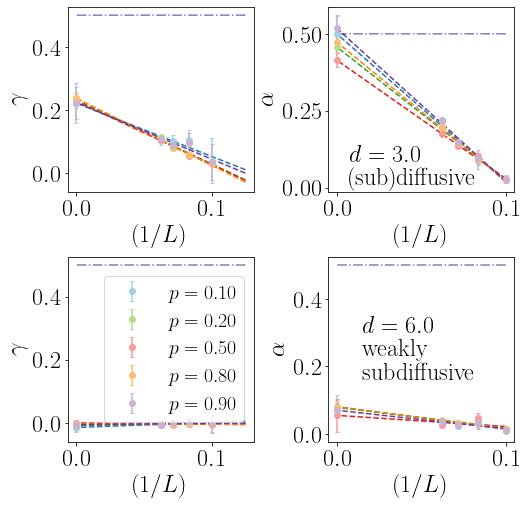

In [72]:
from scipy.ndimage import gaussian_filter as gf

mpl.rcParams['figure.figsize'] = (8,8)
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Paired.colors)
fig, axes = plt.subplots(2,2)
ax1,ax2 = axes[0]
bx1,bx2 = axes[1]

axlist = [[ax1,ax2],[bx1,bx2]]
reps = 512
Llist = [10,12,14,16]
    
axcount = 0
for d in [3.0,6.0]:
    axes = axlist[axcount]
    for p in [0.1,0.2,0.5,0.8,0.9]:
        count = 0
        alist = np.zeros((len(Llist)))
        errlist = np.zeros((len(Llist)))
        for L in Llist:

            imblist = np.zeros((reps,100))
            for rep in range(reps):
                with h5py.File('data6/dataN%s/dyn-d%.2f-Jz%.2f-p%s-rep%s.h5' %(L,d,1.0,p,rep),'r') as hf:
                    zlist = np.array(hf.get('imb'))
                    tlist = np.array(hf.get('tlist'))

                    imblist[rep] = zlist

            imblist = np.mean(imblist,axis=0)
            fit,cov = np.polyfit(np.log10(tlist[-50::]),np.log10(np.abs(imblist)[-50::]),1,cov=True)
            alist[count] = -fit[0]
            errlist[count] = np.sqrt(np.diag(cov)[0])
            count += 1

        fit,cov = np.polyfit(([1/L for L in Llist]),alist,1,cov=True)
        axes[0].errorbar((np.concatenate(([0],[1/L for L in Llist]))),np.concatenate(([[fit[-1]],alist])),yerr=np.concatenate(([np.sqrt(np.diag(cov)[-1])],errlist)),fmt='o',capsize=2.0,label=r'$p = %.2f$' %p)
        axes[0].plot(([1/L for L in range(8,10000)]),[fit[-1]+(fit[0])*t for t in ([1/L for L in range(8,10000)])],'--')

    axes[0].plot(([1/L for L in range(8,10000)]),0.5*np.ones(9992),'-.',color='navy',alpha=0.5)
    axes[0].set(xlabel=r'$(1/L)$',ylabel=r'$\gamma$')

    for p in [0.1,0.2,0.5,0.8,0.9]:
        count = 0
        alist = np.zeros((len(Llist)))
        errlist = np.zeros((len(Llist)))
        for L in Llist:
  
            clist = np.zeros((reps,100))
            for rep in range(reps):
                with h5py.File('data6/dataN%s/dyn-d%.2f-Jz%.2f-p%s-rep%s.h5' %(L,d,1.0,p,rep),'r') as hf:
                    zlist = np.array(hf.get('inf_temp_corr'))
                    tlist = np.array(hf.get('tlist'))

                    clist[rep] = zlist.real

            clist = np.mean(clist,axis=0)
            
            tmin = -35
            if L < 10:
                tmax = -23
            elif 10 < L < 13:
                tmax = -20
            elif L == 13 or L == 14:
                tmax = -10
            elif L > 14:
                tmax = -3

            fit,cov = np.polyfit(np.log(tlist[tmin:tmax]),np.log(np.abs(clist)[tmin:tmax]),1,cov=True)
            alist[count] = -fit[0]
            errlist[count] = np.sqrt(np.diag(cov)[0])
            count += 1

        fit,cov = np.polyfit(([1/L for L in Llist]),alist,1,cov=True)
        axes[1].errorbar((np.concatenate(([0],[1/L for L in Llist]))),np.concatenate(([[fit[-1]],alist])),yerr=np.concatenate(([np.sqrt(np.diag(cov)[-1])],errlist)),fmt='o',capsize=2.0,label=r'$p = %.2f$' %p)
        axes[1].plot(([1/L for L in range(10,10000)]),[fit[-1]+(fit[0])*t for t in ([1/L for L in range(10,10000)])],'--')

    axes[1].plot(([1/L for L in range(10,10000)]),0.5*np.ones(9990),'-.',color='navy',alpha=0.5)
    axes[1].set(xlabel=r'$(1/L)$',ylabel=r'$\alpha$')

    axcount += 1

axlist[-1][0].legend(loc='center right',fontsize=20)
plt.subplots_adjust(hspace=0.35,wspace=0.4)
axlist[0][1].text(0.007,0.085,r'$d=3.0$')
axlist[0][1].text(0.007,0.01,r'(sub)diffusive')

axlist[1][1].text(0.015,0.3,r'$d=6.0$')
axlist[1][1].text(0.015,0.23,r'weakly')
axlist[1][1].text(0.015,0.16,r'subdiffusive')

plt.savefig('Fig9.pdf',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

### Figure 10

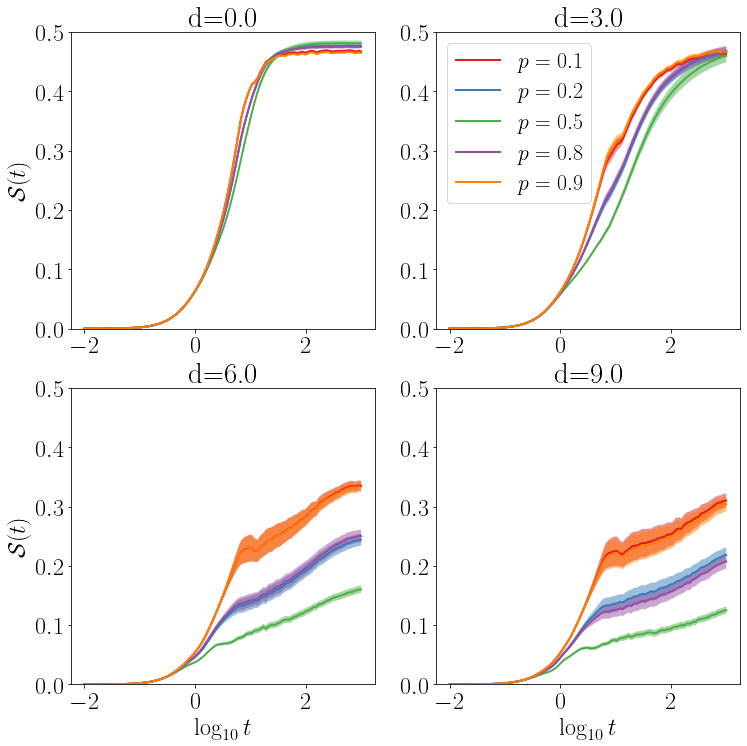

In [73]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,12)
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Set1.colors)

fig, axes = plt.subplots(2,2)
ax1,ax2 = axes[0]
bx1,bx2 = axes[1]
axlist=[ax1,ax2,bx1,bx2]

reps = 1024
dc = 0
for d in [0.0,3.0,6.0,9.0]:
    ax = axlist[dc]
    for L in [16]:
        for p in [0.1,0.2,0.5,0.8,0.9]:
            entlist = np.zeros((reps,100))
            cr_var_list = np.zeros(100)
            cr_var_list2 = np.zeros(100)
            for rep in range(reps):
                with h5py.File('data2/dataN%s/dyn-d%.2f-Jz%.2f-p%.2f-rep%s.h5' %(L,d,1.0,p,rep),'r') as hf:
                    ent = np.array(hf.get('ent'))
                    tlist = np.array(hf.get('tlist'))

                    entlist[rep] = ent.real

            entlist2 = np.mean(entlist,axis=0)
            varlist = np.var(entlist,axis=0)
            entlist = entlist2
            for v in range(len(varlist)):
                cr_var_list[v] = (entlist[v])+(varlist[v])
                cr_var_list2[v] = (entlist[v])-(varlist[v])

            ax.plot(np.log10(tlist),(np.abs(entlist)),'-',label=r'$p = %s$' %p,linewidth=2)
            ax.fill_between(np.log10(tlist),(np.abs(cr_var_list2)),(np.abs(cr_var_list)),alpha=0.5)

            ax.set(ylim=(0,0.5),title=r'd=%.1f' %d)

    dc += 1 

ax1.set(ylabel=r'$\mathcal{S}(t)$')
bx1.set(ylabel=r'$\mathcal{S}(t)$')
bx1.set(xlabel=r'$\log_{10}t$')
bx2.set(xlabel=r'$\log_{10}t$')
ax2.legend(loc='upper left',fontsize=22)
plt.savefig('Fig10.pdf',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

### Figure 11

9.0


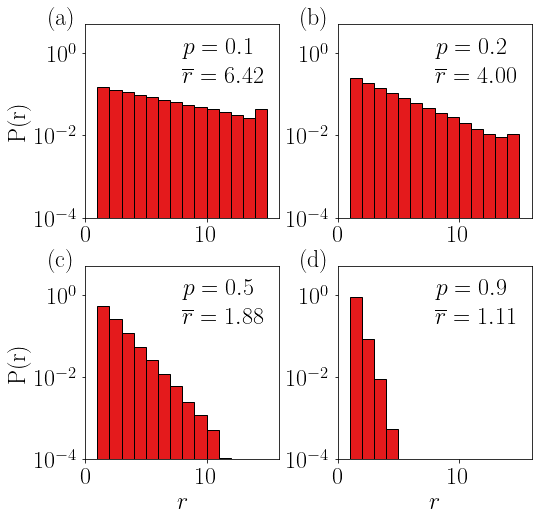

In [378]:
mpl.rcParams['figure.figsize'] = (8,8)

fig, axes = plt.subplots(2,2)
ax1,ax2 = axes[0]
bx1,bx2 = axes[1]
axlist = [ax1,ax2,bx1,bx2]
labellist = ['(a)','(b)','(c)','(d)']

print(d)

def asymp(n,p):
    return np.log(n*(1-p))/np.log(1/p) + 0.577*np.log(1/p)-1/2

def dist(n,p,reps=20000):
    dist = []
    for rep in range(reps):
        hlist = [np.random.choice([1.0,np.random.uniform(-d,d)],p=[1-p,p]) for i in range(n)]
        count = []
        for key,group in groupby(hlist):
            if key == 1.0:
                count += [sum(1 for _ in group)]
        dist += count
        
    return dist

plist = [0.1,0.2,0.5,0.9]
bins = [i for i in range(n)]
count = 0
for n in [16]:
    for p in plist:
#         temp = []
        ax = axlist[count]
        temp = dist(n,p)
        ax.hist(temp,density=True,log=True,bins=bins,edgecolor='k')
        ax.set(xlim=(0,n),ylim=(0.0001,5))
        ax.text(8,1,r'$p = %s$' %p)
        ax.text(8,0.2,r'$\overline{r} = %.2f$' %np.mean(temp))
#         ax.text(8,0.05,r'$\overline{L} = %.2f$' %asymp(n,(1-p)))
        ax.text(-3,5,r'%s' %labellist[count])
        count += 1
        
ax1.set(ylabel=r'P(r)')
bx1.set(ylabel=r'P(r)',xlabel=r'$r$')
bx2.set(xlabel=r'$r$')
plt.subplots_adjust(hspace=0.25,wspace=0.3)
plt.savefig('Fig11.pdf',dpi=300,bbox_inches='tight')
plt.show()
plt.close()